In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#read in our data
df_full = pd.read_csv('data/2018_missoula_marathon_full.csv')
df_half = pd.read_csv('data/2018_missoula_marathon_half.csv')

### Cleaning & Wrangling

In [3]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 12 columns):
Place        1034 non-null int64
Name         1034 non-null object
City         1012 non-null object
Bib_No       1034 non-null int64
Age          1034 non-null int64
Gender       1034 non-null object
Age_Group    1034 non-null object
Chip_Time    1034 non-null object
Gun_Time     1034 non-null object
Chip_Diff    1028 non-null object
Pace         1034 non-null object
Race         1034 non-null object
dtypes: int64(3), object(9)
memory usage: 97.0+ KB


In [4]:
df_half.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2659 entries, 0 to 2658
Data columns (total 12 columns):
Place        2659 non-null int64
Name         2659 non-null object
City         2645 non-null object
Bib_No       2659 non-null int64
Age          2658 non-null float64
Gender       2659 non-null object
Age_Group    2659 non-null object
Chip_Time    2659 non-null object
Gun_Time     2659 non-null object
Chip_Diff    2647 non-null object
Pace         2659 non-null object
Race         2659 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 249.4+ KB


Looking at the info, it appears that we have issues with missing 'City' fields and missingt 'Chip_Diff' fields.

All missing 'City' entries are for race pacers. Let's make an assumption that they are all from Missoula. The missing 'Chip_Diff' entries occur when the chip time and the gun time are the same, so let's replace those with zeros.

There's one more issue to deal with. We're missing an age for one male half marathon runner (bib number 9384). That runner is listed as 'Unknown Participant' and is missing other details as well. Let's drop that record.

In [5]:
#first let's drop our rogue runner
df_half = df_half[df_half.Bib_No != 9384]
df_half.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2658 entries, 0 to 2658
Data columns (total 12 columns):
Place        2658 non-null int64
Name         2658 non-null object
City         2645 non-null object
Bib_No       2658 non-null int64
Age          2658 non-null float64
Gender       2658 non-null object
Age_Group    2658 non-null object
Chip_Time    2658 non-null object
Gun_Time     2658 non-null object
Chip_Diff    2646 non-null object
Pace         2658 non-null object
Race         2658 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 270.0+ KB


In [6]:
df_half[df_half.City.isna()]

,Place,Name,City,Bib_No,Age,Gender,Age_Group,Chip_Time,Gun_Time,Chip_Diff,Pace,Race
87,88,Kate Johnson - Pacer,NaN,3400,26.0,F,14/201:25-29,1:45:16.99,1:45:26.48,0:09.49,8:02/M,half
519,520,Ilana Abrahamson -Pacer,NaN,2107,42.0,F,68/211:40-44,2:09:46.25,2:10:25.72,0:39.47,9:54/M,half
520,521,Sara McAllister - Pacer,NaN,3819,35.0,F,103/293:35-39,2:09:46.70,2:10:26.13,0:39.43,9:54/M,half
630,631,Rachel Toor - Pacer,NaN,7029,56.0,F,24/152:55-59,2:14:36.70,2:15:48.73,1:12.03,10:16/M,half
943,944,Theneshia Glaze - Pacer,NaN,3011,41.0,F,117/211:40-44,2:29:50.89,2:31:52.41,2:01.52,11:26/M,half
978,979,Rebecca Garner -Pacer,NaN,2971,52.0,F,68/173:50-54,2:31:05.50,2:33:06.82,2:01.32,11:32/M,half
1903,51,Dillon May - Pacer,NaN,3809,21.0,M,12/32:20-24,1:29:38.56,1:29:42.16,0:03.60,6:51/M,half
1904,52,Nicolas Composto -Pacer,NaN,2578,25.0,M,5/68:25-29,1:29:38.79,1:29:42.21,0:03.42,6:51/M,half
1997,145,Scott Davis - Pacer,NaN,2689,26.0,M,15/68:25-29,1:45:17.19,1:45:26.60,0:09.41,8:02/M,half
2184,332,Danny Tenenbaum - Pacer,NaN,4799,32.0,M,56/97:30-34,2:00:16.96,2:00:39.64,0:22.68,9:11/M,half


In [7]:
df_half.City = df_half.City.fillna('Missoula  MT US')

In [8]:
df_half[df_half.City.isna()]

,Place,Name,City,Bib_No,Age,Gender,Age_Group,Chip_Time,Gun_Time,Chip_Diff,Pace,Race


In [9]:
df_half[df_half.Chip_Diff.isna()]

,Place,Name,City,Bib_No,Age,Gender,Age_Group,Chip_Time,Gun_Time,Chip_Diff,Pace,Race
707,708,Emily Cheroske,Missoula MT US,5182,22.0,F,66/121:20-24,2:18:57.49,2:18:57.49,NaN,10:36/M,half
1007,1008,Claire Rappold,Missoula MT US,4333,25.0,F,121/201:25-29,2:33:05.99,2:33:05.99,NaN,11:41/M,half
1012,1013,Janice Loudon,Overland Park KS US,3703,58.0,F,62/152:55-59,2:33:41.21,2:33:41.21,NaN,11:44/M,half
1659,1660,Marybeth Healey,Coeur D Alene ID US,3160,57.0,F,128/152:55-59,3:32:18.86,3:32:18.86,NaN,16:12/M,half
1788,1789,Dawn Clark,Butte MT US,2546,59.0,F,146/152:55-59,4:00:36.85,4:00:36.85,NaN,18:22/M,half
1808,1809,Amanda Ledoux,Spokane Valley WA US,3644,44.0,F,202/211:40-44,4:09:38.16,4:09:38.16,NaN,19:03/M,half
1809,1810,Celina Taylor,Spokane WA US,4788,42.0,F,203/211:40-44,4:09:38.62,4:09:38.62,NaN,19:03/M,half
1844,1845,Alina McCue,Missoula MT US,5185,39.0,F,293/293:35-39,4:31:55.15,4:31:55.15,NaN,20:45/M,half
1889,37,Connor Morris,Port Orchard WA US,5298,20.0,M,11/32:20-24,1:26:38.11,1:26:38.11,NaN,6:37/M,half
1923,71,Lucca Wellenstein,Missoula MT US,4993,16.0,M,16/45:15-19,1:33:38.00,1:33:38.00,NaN,7:09/M,half


In [10]:
df_half.Chip_Diff = df_half.Chip_Diff.fillna(0)
df_half[df_half.Chip_Diff.isna()]

,Place,Name,City,Bib_No,Age,Gender,Age_Group,Chip_Time,Gun_Time,Chip_Diff,Pace,Race


In [11]:
#let's fix those same issues with the full results.
df_full.City = df_full.City.fillna('Missoula  MT US')
df_full.Chip_Diff = df_full.Chip_Diff.fillna(0)

In [12]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 12 columns):
Place        1034 non-null int64
Name         1034 non-null object
City         1034 non-null object
Bib_No       1034 non-null int64
Age          1034 non-null int64
Gender       1034 non-null object
Age_Group    1034 non-null object
Chip_Time    1034 non-null object
Gun_Time     1034 non-null object
Chip_Diff    1034 non-null object
Pace         1034 non-null object
Race         1034 non-null object
dtypes: int64(3), object(9)
memory usage: 97.0+ KB


In [13]:
df_half.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2658 entries, 0 to 2658
Data columns (total 12 columns):
Place        2658 non-null int64
Name         2658 non-null object
City         2658 non-null object
Bib_No       2658 non-null int64
Age          2658 non-null float64
Gender       2658 non-null object
Age_Group    2658 non-null object
Chip_Time    2658 non-null object
Gun_Time     2658 non-null object
Chip_Diff    2658 non-null object
Pace         2658 non-null object
Race         2658 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 270.0+ KB


Ok. We have our missing/messy values worked out. Next, work our our columns.

The 'Age_Group' field is holding both the runners place out of the total for that age group and the label. For example:

66/121:20-24 - The runner was number 66 out of 121 runners in the 20-24 age group.

Let's drop the total number in the group. We can always calculate that if we need it. And let's split the data into two colums one for place and one for group.

In [14]:
df_half['Age_Group_Place'], df_half['Age_Group'] = df_half.Age_Group.str.split(':', 1).str
df_half['Age_Group_Place'], _ = df_half.Age_Group_Place.str.split('/', 1).str

In [15]:
df_full['Age_Group_Place'], df_full['Age_Group'] = df_full.Age_Group.str.split(':', 1).str
df_full['Age_Group_Place'], _ = df_full.Age_Group_Place.str.split('/', 1).str

Let's trim off the '/M' in Pace in case we want to use it numerically.

In [16]:
df_full.Pace = df_full.Pace.str[:-2]
df_half.Pace = df_half.Pace.str[:-2]

In [17]:
df_half.head()

,Place,Name,City,Bib_No,Age,Gender,Age_Group,Chip_Time,Gun_Time,Chip_Diff,Pace,Race,Age_Group_Place
0,1,Makena Morley,Bigfork MT US,2051,21.0,F,20-24,1:15:50.45,1:15:51.79,0:01.34,5:47,half,1
1,2,Misiker Demessie,Colorado Springs CO US,2060,31.0,F,30-34,1:18:03.69,1:18:05.58,0:01.89,5:57,half,1
2,3,Kelsi Lasota,Estes Park CO US,2052,22.0,F,20-24,1:18:41.68,1:18:43.68,0:02.00,6:00,half,2
3,4,Elizabeth Wasserman,Goshen NY US,2056,23.0,F,20-24,1:19:18.71,1:19:20.92,0:02.21,6:03,half,3
4,5,Andrea Masterson,Seattle WA US,2053,21.0,F,20-24,1:21:38.93,1:21:40.32,0:01.39,6:14,half,4


In [18]:
df_full.head()

,Place,Name,City,Bib_No,Age,Gender,Age_Group,Chip_Time,Gun_Time,Chip_Diff,Pace,Race,Age_Group_Place
0,1,Keely Baker,Great Falls MT US,52,26,F,25-29,2:51:46.12,2:51:48.01,0:01.89,6:33,full,1
1,2,Trisha Drobeck,Missoula MT US,51,38,F,35-39,2:53:28.28,2:53:30.08,0:01.80,6:37,full,1
2,3,Chelsea Dana,Billings MT US,355,35,F,35-39,3:01:37.43,3:01:43.04,0:05.61,6:56,full,2
3,4,Evie Tate,Missoula MT US,1211,23,F,20-24,3:09:32.24,3:09:45.38,0:13.14,7:14,full,1
4,5,Erin Forde,Missoula MT US,56,25,F,25-29,3:09:37.84,3:09:41.66,0:03.82,7:14,full,2


Looks good. Let's combine and save the output...in hindsight, we should have combined sooner and saved ourselves some steps, but I didn't think I was going to until just now. Oh well, live and learn.

In [19]:
df_all = pd.concat([df_full, df_half])

In [20]:
df_all.sample(10)

,Place,Name,City,Bib_No,Age,Gender,Age_Group,Chip_Time,Gun_Time,Chip_Diff,Pace,Race,Age_Group_Place
1719,1720,Ashlee Bell,Lolo MT US,2275,30.0,F,30-34,3:45:54.74,3:48:53.62,2:58.88,17:15,half,258
1646,1647,Lara Chavez,Littleton CO US,2525,34.0,F,30-34,3:30:15.60,3:34:34.24,4:18.64,16:03,half,249
607,135,Billy Moriarity,Missoula MT US,1366,40.0,M,40-44,3:44:41.28,3:44:54.78,0:13.50,8:35,full,22
1034,1035,Jackie Tunis,Missoula MT US,4869,28.0,F,25-29,2:34:31.77,2:36:24.92,1:53.15,11:48,half,124
1491,1492,Jennifer Tobiason,Juneau AK US,4840,29.0,F,25-29,3:10:37.40,3:14:21.83,3:44.43,14:33,half,173
1671,1672,Judy Sitton,Saint John WA US,4639,59.0,F,55-59,3:34:39.94,3:39:20.74,4:40.80,16:23,half,129
275,276,Tania Diener,Regina SK CA,376,54.0,F,50-54,5:00:42.26,5:02:12.70,1:30.44,11:29,full,20
96,97,Rene Parks,Bourbonnais IL US,933,43.0,F,40-44,3:59:54.40,4:00:35.29,0:40.89,9:09,full,11
483,484,Dorren McDermott,Bryn Mawr PA US,3850,50.0,F,50-54,2:08:05.65,2:09:15.92,1:10.27,9:47,half,25
622,623,Heather Pettit,Genesee ID US,4253,31.0,F,30-34,2:14:17.32,2:16:48.27,2:30.95,10:15,half,139


Let's save it and move on to analysis.

In [21]:
df_all['Chip_Time_Minutes'] = pd.to_timedelta(df_all.Chip_Time).dt.total_seconds()/60
df_all['Gun_Time_Minutes'] = pd.to_timedelta(df_all.Gun_Time).dt.total_seconds()/60
df_all['Chip_Diff_Seconds'] = (df_all.Gun_Time_Minutes - df_all.Chip_Time_Minutes)*60

In [22]:
df_all.head()

,Place,Name,City,Bib_No,Age,Gender,Age_Group,Chip_Time,Gun_Time,Chip_Diff,Pace,Race,Age_Group_Place,Chip_Time_Minutes,Gun_Time_Minutes,Chip_Diff_Seconds
0,1,Keely Baker,Great Falls MT US,52,26.0,F,25-29,2:51:46.12,2:51:48.01,0:01.89,6:33,full,1,171.768667,171.800167,1.89
1,2,Trisha Drobeck,Missoula MT US,51,38.0,F,35-39,2:53:28.28,2:53:30.08,0:01.80,6:37,full,1,173.471333,173.501333,1.80
2,3,Chelsea Dana,Billings MT US,355,35.0,F,35-39,3:01:37.43,3:01:43.04,0:05.61,6:56,full,2,181.623833,181.717333,5.61
3,4,Evie Tate,Missoula MT US,1211,23.0,F,20-24,3:09:32.24,3:09:45.38,0:13.14,7:14,full,1,189.537333,189.756333,13.14
4,5,Erin Forde,Missoula MT US,56,25.0,F,25-29,3:09:37.84,3:09:41.66,0:03.82,7:14,full,2,189.630667,189.694333,3.82


In [23]:
df_all['Pace_Decimal'] = np.where(df_all.Race == 'full', df_all.Chip_Time_Minutes/26.2, df_all.Chip_Time_Minutes/13.1)

Fix our data types

In [24]:
df_all.Race = df_all.Race.astype('category')
df_all.Age_Group_Place = df_all.Age_Group_Place.astype('int32')

In [25]:
df_all.describe()

,Place,Bib_No,Age,Age_Group_Place,Chip_Time_Minutes,Gun_Time_Minutes,Chip_Diff_Seconds,Pace_Decimal
count,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000
mean,626.201788,2957.951246,41.475623,65.133261,186.360980,188.007287,98.778448,11.252631
std,505.587348,1632.593848,13.657386,61.065528,73.533441,73.693673,80.275205,2.891586
min,1.000000,1.000000,10.000000,1.000000,67.856500,67.856500,0.000000,5.179885
25%,231.000000,1298.750000,31.000000,20.000000,129.073458,130.385250,32.625000,9.131054
50%,462.000000,3136.500000,40.000000,45.000000,163.896333,166.416917,78.815000,10.753575
75%,930.250000,4313.250000,52.000000,89.000000,231.915833,233.535417,145.535000,12.792576
max,1853.000000,7032.000000,85.000000,293.000000,472.856333,473.926167,737.910000,30.162748


In [26]:
#I think we're done with our cleaning and feature engineering. Let's save a copy.
df_all.to_csv('data/2018_missoula_marathon_all_clean.csv', index=False)

### Exploration

Let's start by looking at some of our numeric values.

In [27]:
#let's start by updating our 'half' and 'full' data frames.
df_full = df_all[df_all.Race == 'full']
df_half = df_all[df_all.Race == 'half']

In [28]:
df_full.describe()

,Place,Bib_No,Age,Age_Group_Place,Chip_Time_Minutes,Gun_Time_Minutes,Chip_Diff_Seconds,Pace_Decimal
count,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,260.872340,833.135397,41.327853,30.250484,278.160529,279.054454,53.635493,10.616814
std,152.515542,763.499283,12.466329,20.927342,58.572159,59.052299,36.166043,2.235579
min,1.000000,1.000000,13.000000,1.000000,147.876500,147.891667,0.000000,5.644141
25%,130.000000,430.250000,31.000000,12.250000,235.323250,235.769458,22.160000,8.981803
50%,259.000000,773.500000,40.000000,27.000000,270.533500,271.499583,48.320000,10.325706
75%,388.000000,1113.750000,51.000000,45.000000,314.664333,315.965833,82.325000,12.010089
max,561.000000,7012.000000,80.000000,89.000000,472.856333,473.926167,178.840000,18.047952


### Full
**Age**
- Min/Max: 13/80
- Mean: 41.33
- Std Dev: 12.47

**Chip Time in Minutes**
- Min/Max: 147.88/472.86
- Mean: 278.16
- Std Dev: 59.05

**Pace**
- Min/Max: 5.64/18.05
- Mean: 10.62
- Std Dev: 2.24

In [29]:
df_half.describe()

,Place,Bib_No,Age,Age_Group_Place,Chip_Time_Minutes,Gun_Time_Minutes,Chip_Diff_Seconds,Pace_Decimal
count,2658.000000,2658.000000,2658.000000,2658.00000,2658.000000,2658.000000,2658.000000,2658.000000
mean,768.320166,3784.534989,41.533108,78.70316,150.649642,152.588638,116.339703,11.499973
std,523.361209,1017.588079,14.095374,65.97093,40.278087,41.321930,85.684305,3.074663
min,1.000000,732.000000,10.000000,1.00000,67.856500,67.856500,0.000000,5.179885
25%,333.000000,2920.250000,31.000000,26.00000,120.931167,121.994625,40.975000,9.231387
50%,665.000000,3772.500000,40.000000,60.00000,143.679667,145.735917,102.980000,10.967913
75%,1188.750000,4635.750000,52.000000,117.00000,172.899375,175.774125,182.555000,13.198426
max,1853.000000,7032.000000,85.000000,293.00000,395.132000,400.393500,737.910000,30.162748


### Half
**Age**
- Min/Max: 10/85
- Mean: 41.53
- Std Dev: 14.1

**Chip Time in Minutes**
- Min/Max: 67.86/395.13
- Mean: 150.65
- Std Dev: 40.28

**Pace**
- Min/Max: 5.18/30.16
- Mean: 11.5
- Std Dev: 3.07

In [30]:
#How many in each race?
df_all.Race.value_counts()

half    2658
full    1034
Name: Race, dtype: int64

In [31]:
#Breakdown by gender?
df_all.Gender.value_counts()

F    2326
M    1366
Name: Gender, dtype: int64

In [32]:
#Gender for full?
df_all[df_all.Race=='full'].Gender.value_counts()

M    561
F    473
Name: Gender, dtype: int64

In [33]:
#Gender for half?
df_all[df_all.Race=='half'].Gender.value_counts()

F    1853
M     805
Name: Gender, dtype: int64

Interesting. The full marathon is "roughly" 50/50 men to women. The half is greatly skewed to women.

In [34]:
#hours by age group and gender for full
df_all[df_all.Race=='full'].groupby(['Age_Group', 'Gender'])['Chip_Time_Minutes'].mean()/60

Age_Group  Gender
 1-19      F         4.458812
           M         3.878442
20-24      F         4.347842
           M         4.216637
25-29      F         4.553886
           M         4.154031
30-34      F         4.702098
           M         4.031711
35-39      F         4.719849
           M         4.291318
40-44      F         4.755633
           M         4.142777
45-49      F         5.018312
           M         4.564246
50-54      F         5.393816
           M         4.670256
55-59      F         5.288266
           M         4.944000
60-64      F         5.523234
           M         5.016582
65-69      F         5.818094
           M         5.065590
70-74      F         6.375483
           M         5.518641
75-79      F         7.880939
           M         4.621044
80-99      M         4.528636
Name: Chip_Time_Minutes, dtype: float64

In [35]:
#hours by age group and gender for half
df_all[df_all.Race=='half'].groupby(['Age_Group', 'Gender'])['Chip_Time_Minutes'].mean()/60

Age_Group  Gender
 1-14      F         2.738334
           M         2.332619
15-19      F         2.327352
           M         1.733924
20-24      F         2.335598
           M         1.836160
25-29      F         2.518791
           M         2.164842
30-34      F         2.370338
           M         2.048522
35-39      F         2.475548
           M         2.188634
40-44      F         2.569758
           M         2.217029
45-49      F         2.702901
           M         2.325477
50-54      F         2.812339
           M         2.364170
55-59      F         2.850190
           M         2.434960
60-64      F         2.955022
           M         2.359178
65-69      F         3.286505
           M         2.777554
70-74      F         3.525606
           M         2.958034
75-79      F         3.372020
           M         3.144752
80-99      F         3.784268
           M         3.085224
Name: Chip_Time_Minutes, dtype: float64

In [36]:
df_all[df_all.Race=='full'].groupby(['Age_Group', 'Gender'])['Place'].min()

Age_Group  Gender
 1-19      F          20
           M          14
20-24      F           4
           M          15
25-29      F           1
           M           1
30-34      F           9
           M           3
35-39      F           2
           M           2
40-44      F           8
           M           5
45-49      F          48
           M          39
50-54      F          14
           M          37
55-59      F          61
           M          91
60-64      F          96
           M          76
65-69      F         161
           M         143
70-74      F         432
           M         172
75-79      F         473
           M         359
80-99      M         344
Name: Place, dtype: int64

In [37]:
df_all[df_all.Race=='half'].groupby(['Age_Group', 'Gender'])['Place'].min()

Age_Group  Gender
 1-14      F           33
           M           93
15-19      F            7
           M            9
20-24      F            1
           M            2
25-29      F            9
           M            7
30-34      F            2
           M            8
35-39      F            6
           M            1
40-44      F           20
           M            6
45-49      F           39
           M           22
50-54      F           57
           M           28
55-59      F          134
           M           85
60-64      F          158
           M           60
65-69      F          680
           M           87
70-74      F          990
           M          223
75-79      F          670
           M          418
80-99      F         1690
           M          601
Name: Place, dtype: int64

In [38]:
df_all[df_all.Race=='full'].groupby(['Age_Group', 'Gender'])['Pace_Decimal'].mean()

Age_Group  Gender
 1-19      F         10.211019
           M          8.881928
20-24      F          9.956889
           M          9.656420
25-29      F         10.428748
           M          9.513048
30-34      F         10.768164
           M          9.232925
35-39      F         10.808815
           M          9.827445
40-44      F         10.890762
           M          9.487275
45-49      F         11.492317
           M         10.452473
50-54      F         12.352251
           M         10.695242
55-59      F         12.110533
           M         11.322138
60-64      F         12.648626
           M         11.488355
65-69      F         13.323878
           M         11.600588
70-74      F         14.600344
           M         12.638108
75-79      F         18.047952
           M         10.582545
80-99      M         10.370922
Name: Pace_Decimal, dtype: float64

In [39]:
df_all[df_all.Race=='half'].groupby(['Age_Group', 'Gender'])['Pace_Decimal'].std()

Age_Group  Gender
 1-14      F         2.777596
           M         2.240671
15-19      F         2.826803
           M         1.486098
20-24      F         2.490917
           M         2.687055
25-29      F         2.574310
           M         2.541247
30-34      F         2.567760
           M         1.982420
35-39      F         2.667422
           M         2.676687
40-44      F         3.068442
           M         2.730167
45-49      F         3.208180
           M         3.324467
50-54      F         2.881329
           M         2.694387
55-59      F         2.814534
           M         2.416217
60-64      F         2.774438
           M         2.533408
65-69      F         2.598027
           M         3.878289
70-74      F         2.665562
           M         3.309942
75-79      F         2.603771
           M         2.746526
80-99      F         0.991902
           M         2.314819
Name: Pace_Decimal, dtype: float64

In [40]:
#make sure we have the latest for some plotting.
df_half = df_all[df_all.Race == 'half']
df_full = df_all[df_all.Race == 'full']

### Questions

- What's the breakdown of gender?
- What's the time breakdown by gender?
- What age group performs the best?
- Where are people coming from for the race?
- Are the winners from nearby?

Let's begin!

### What is the breakdown of gender for each race?

In [41]:
#Gender counts for the full?
df_full.Gender.value_counts()

M    561
F    473
Name: Gender, dtype: int64

In [42]:
#Gender counts for the half?
df_half.Gender.value_counts()

F    1853
M     805
Name: Gender, dtype: int64

Whoa! While the full marathon is "roughly" an even split, the half is heavily skewed towards females! More than twice as many!

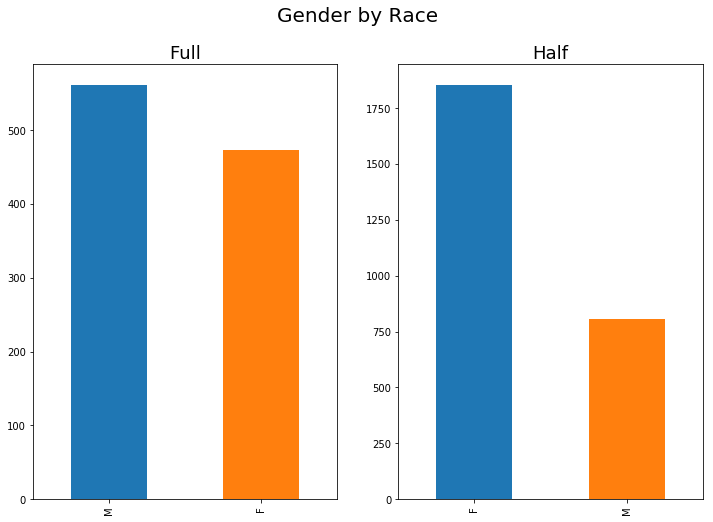

In [43]:
#Let's plot those
fig, axarr = plt.subplots(1, 2, figsize=(12, 8))
plt.suptitle('Gender by Race', fontsize=20)


df_full.Gender.value_counts().plot.bar(ax=axarr[0])
axarr[0].set_title('Full', fontsize=18)

df_half.Gender.value_counts().plot.bar(ax=axarr[1])
axarr[1].set_title('Half', fontsize=18)

plt.show();

### What is the time breakdown by gender?

In [44]:
#first let's look at overall time by gender across age groups
df_full.groupby(['Age_Group', 'Gender'])['Chip_Time_Minutes'].mean()/60

Age_Group  Gender
 1-19      F         4.458812
           M         3.878442
20-24      F         4.347842
           M         4.216637
25-29      F         4.553886
           M         4.154031
30-34      F         4.702098
           M         4.031711
35-39      F         4.719849
           M         4.291318
40-44      F         4.755633
           M         4.142777
45-49      F         5.018312
           M         4.564246
50-54      F         5.393816
           M         4.670256
55-59      F         5.288266
           M         4.944000
60-64      F         5.523234
           M         5.016582
65-69      F         5.818094
           M         5.065590
70-74      F         6.375483
           M         5.518641
75-79      F         7.880939
           M         4.621044
80-99      M         4.528636
Name: Chip_Time_Minutes, dtype: float64

In [45]:
df_half.groupby(['Age_Group', 'Gender'])['Chip_Time_Minutes'].mean()/60

Age_Group  Gender
 1-14      F         2.738334
           M         2.332619
15-19      F         2.327352
           M         1.733924
20-24      F         2.335598
           M         1.836160
25-29      F         2.518791
           M         2.164842
30-34      F         2.370338
           M         2.048522
35-39      F         2.475548
           M         2.188634
40-44      F         2.569758
           M         2.217029
45-49      F         2.702901
           M         2.325477
50-54      F         2.812339
           M         2.364170
55-59      F         2.850190
           M         2.434960
60-64      F         2.955022
           M         2.359178
65-69      F         3.286505
           M         2.777554
70-74      F         3.525606
           M         2.958034
75-79      F         3.372020
           M         3.144752
80-99      F         3.784268
           M         3.085224
Name: Chip_Time_Minutes, dtype: float64

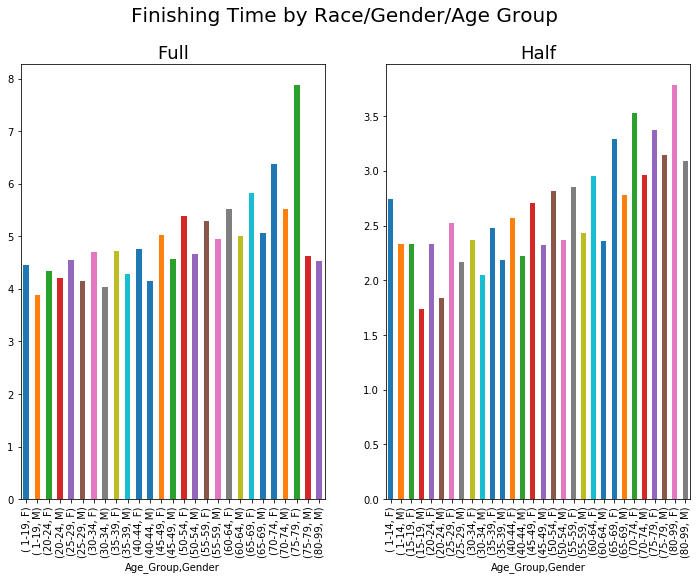

In [46]:
#TODO Fix colors: https://python-graph-gallery.com/11-grouped-barplot/
#Make plot more readable.

#plots
fig, axarr = plt.subplots(1, 2, figsize=(12, 8))
plt.suptitle('Finishing Time by Race/Gender/Age Group', fontsize=20)


(df_full.groupby(['Age_Group', 'Gender'])['Chip_Time_Minutes'].mean()/60).plot.bar(ax=axarr[0])
axarr[0].set_title('Full', fontsize=18)

(df_half.groupby(['Age_Group', 'Gender'])['Chip_Time_Minutes'].mean()/60).plot.bar(ax=axarr[1])
axarr[1].set_title('Half', fontsize=18)

plt.show();

In [47]:
#Let's do the same but by pace
df_full.groupby(['Age_Group', 'Gender'])['Pace_Decimal'].mean()

Age_Group  Gender
 1-19      F         10.211019
           M          8.881928
20-24      F          9.956889
           M          9.656420
25-29      F         10.428748
           M          9.513048
30-34      F         10.768164
           M          9.232925
35-39      F         10.808815
           M          9.827445
40-44      F         10.890762
           M          9.487275
45-49      F         11.492317
           M         10.452473
50-54      F         12.352251
           M         10.695242
55-59      F         12.110533
           M         11.322138
60-64      F         12.648626
           M         11.488355
65-69      F         13.323878
           M         11.600588
70-74      F         14.600344
           M         12.638108
75-79      F         18.047952
           M         10.582545
80-99      M         10.370922
Name: Pace_Decimal, dtype: float64

In [48]:
df_half.groupby(['Age_Group', 'Gender'])['Pace_Decimal'].mean()

Age_Group  Gender
 1-14      F         12.541986
           M         10.683750
15-19      F         10.659628
           M          7.941638
20-24      F         10.697394
           M          8.409891
25-29      F         11.536446
           M          9.915306
30-34      F         10.856509
           M          9.382545
35-39      F         11.338388
           M         10.024279
40-44      F         11.769884
           M         10.154331
45-49      F         12.379701
           M         10.651040
50-54      F         12.880941
           M         10.828258
55-59      F         13.054304
           M         11.152490
60-64      F         13.534453
           M         10.805397
65-69      F         15.052694
           M         12.721621
70-74      F         16.147814
           M         13.548248
75-79      F         15.444367
           M         14.403443
80-99      F         17.332525
           M         14.130797
Name: Pace_Decimal, dtype: float64

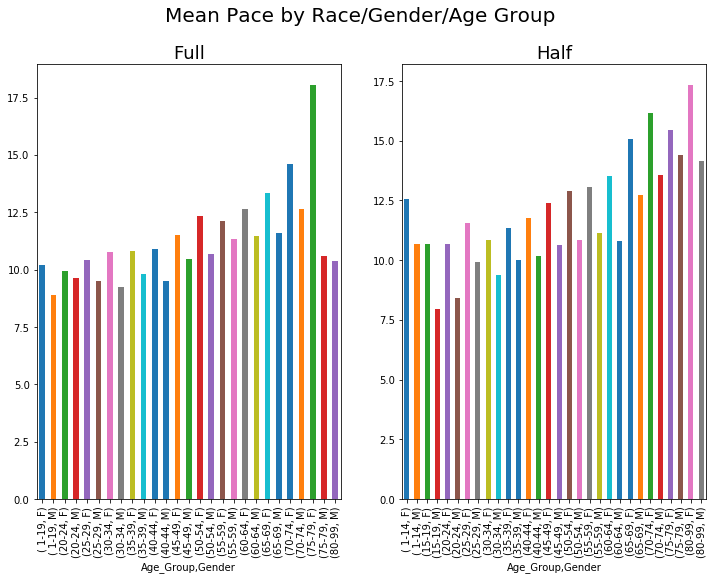

In [49]:
#plots
fig, axarr = plt.subplots(1, 2, figsize=(12, 8))
plt.suptitle('Mean Pace by Race/Gender/Age Group', fontsize=20)


(df_full.groupby(['Age_Group', 'Gender'])['Pace_Decimal'].mean()).plot.bar(ax=axarr[0])
axarr[0].set_title('Full', fontsize=18)

(df_half.groupby(['Age_Group', 'Gender'])['Pace_Decimal'].mean()).plot.bar(ax=axarr[1])
axarr[1].set_title('Half', fontsize=18)

plt.show();

Let's clean those up a bit. All the colors are pretty distracting. Same plots below, but better colors.

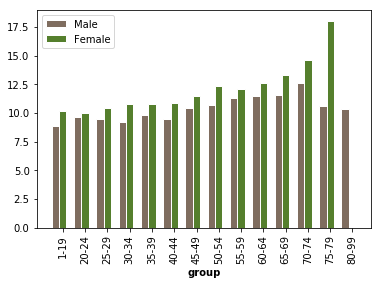

In [50]:
#plots
 
# set width of bar
barWidth = 0.33
 
# set height of bar
bars1 = df_full[df_full.Gender == 'M'].groupby(['Age_Group'])['Pace_Decimal'].mean()
bars2 = df_full[df_full.Gender == 'F'].groupby(['Age_Group'])['Pace_Decimal'].mean()
#add a 0 for a missing value
bars2['80-99'] = 0
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Male')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Female')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold',)
plt.xticks([r + barWidth for r in range(len(bars1))], ['1-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-99' ], rotation=90)
 
# Create legend & Show graphic
plt.legend()
plt.show();


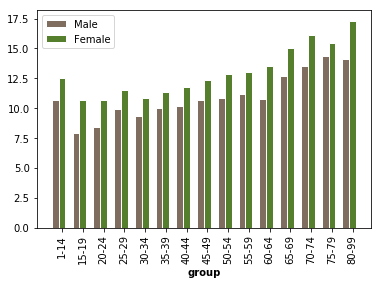

In [51]:
#plots
 
# set width of bar
barWidth = 0.33
 
# set height of bar
bars1 = df_half[df_half.Gender == 'M'].groupby(['Age_Group'])['Pace_Decimal'].mean()
bars2 = df_half[df_half.Gender == 'F'].groupby(['Age_Group'])['Pace_Decimal'].mean()


 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Male')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Female')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold',)
plt.xticks([r + barWidth for r in range(len(bars1))], ['1-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-99'], rotation=90)
 
# Create legend & Show graphic
plt.legend()
plt.show();

Interesting. In all cases, men have a faster mean pace/finish time than women of the same age group. This is somewhat intuitive, but I was curious if at older ages this started to change.

### What age group(s) perform best for each race?

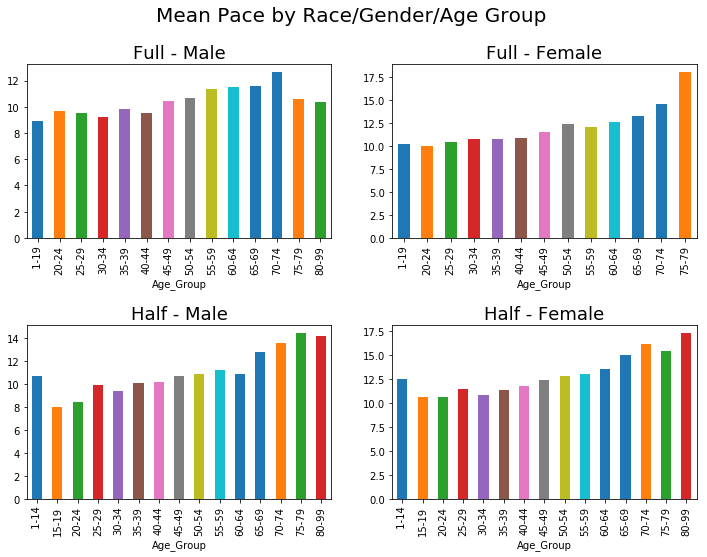

In [52]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))
plt.suptitle('Mean Pace by Race/Gender/Age Group', fontsize=20)
plt.subplots_adjust(hspace = 0.5)

(df_full[df_full.Gender == 'M'].groupby(['Age_Group'])['Pace_Decimal'].mean()).plot.bar(ax=axarr[0][0])
axarr[0][0].set_title('Full - Male', fontsize=18)

(df_full[df_full.Gender == 'F'].groupby(['Age_Group'])['Pace_Decimal'].mean()).plot.bar(ax=axarr[0][1])
axarr[0][1].set_title('Full - Female', fontsize=18)


(df_half[df_half.Gender == 'M'].groupby(['Age_Group'])['Pace_Decimal'].mean()).plot.bar(ax=axarr[1][0])
axarr[1][0].set_title('Half - Male', fontsize=18)

(df_half[df_half.Gender == 'F'].groupby(['Age_Group'])['Pace_Decimal'].mean()).plot.bar(ax=axarr[1][1])
axarr[1][1].set_title('Half - Female', fontsize=18)

plt.show();

There is a basic trend to for younger runners to be faster than older runners, but with a few notable exceptions. First, in the half, the 1-14 is slower than the 15-19 group (incidentally, the 15-19 group looks to be the fastest for the half for both genders. Apparently the half is a young person's race!). For the full, the 1-19 on average are fastest for men, with a noticable dip again at 30-34 and starting at 75-79. Women have a pretty standard increase as ages go up but with 20-24 and 55-59 being slightly below the curve.

### Where are people coming from for the race?

In [53]:
#Top locations by counts
df_full.City.value_counts()[:20]

Missoula  MT US          178
Spokane  WA US            44
Billings  MT US           22
Helena  MT US             18
New York  NY US           13
Portland  OR US           12
Dallas  TX US             11
Bozeman  MT US            11
Seattle  WA US            11
Great Falls  MT US        10
Kalispell  MT US           9
Coeur D Alene  ID US       9
Houston  TX US             7
Chicago  IL US             7
Salt Lake City  UT US      7
Hamilton  MT US            6
Calgary  AB CA             5
Austin  TX US              5
Butte  MT US               5
Lolo  MT US                4
Name: City, dtype: int64

In [54]:
#Top locations by counts
df_half.City.value_counts()[:20]

Missoula  MT US          739
Spokane  WA US           124
Helena  MT US             62
Billings  MT US           54
Great Falls  MT US        54
Bozeman  MT US            44
Kalispell  MT US          42
Lolo  MT US               36
Coeur D Alene  ID US      34
Seattle  WA US            34
Florence  MT US           28
Whitefish  MT US          27
Butte  MT US              26
Stevensville  MT US       25
Portland  OR US           23
Polson  MT US             16
Bigfork  MT US            16
Red Deer  AB CA           15
Frenchtown  MT US         14
Spokane Valley  WA US     14
Name: City, dtype: int64

### Does location determine the winners? Are winners from nearby?

In [55]:
#Top 10 M/F finisher cities for the full
df_full[df_full.Place <= 10]['City'].value_counts()

Missoula  MT US         7
Helena  MT US           2
Billings  MT US         1
Tucson  AZ US           1
Orrville  OH US         1
Santa Fe  NM US         1
Saint Paul  MN US       1
Cheney  MT US           1
Polson  MT US           1
Charlotte  NC US        1
Stevensville  MT US     1
Coeur D Alene  ID US    1
Great Falls  MT US      1
Name: City, dtype: int64

In [56]:
#Top 10 M/F finisher cities for the half
df_half[df_half.Place <= 10]['City'].value_counts()

Seattle  WA US             2
Bozeman  MT US             2
Issaquah  WA US            1
Pocatello  ID US           1
Great Falls  MT US         1
Bigfork  MT US             1
Clearfield  UT US          1
Lakewood  CO US            1
Goshen  NY US              1
Estes Park  CO US          1
Missoula  MT US            1
Watertown  MA US           1
Colorado Springs  CO US    1
Pueblo  CO US              1
Lakeside  MT US            1
Larkspur  CO US            1
Paso Robles  CA US         1
Spokane  WA US             1
Name: City, dtype: int64

So for the full (male and female), there are 12/20 top finishers from within about a 3 hour radius (Missoula, Helena, Polson, Stevensville, and Coeur D Alene) with Missoula having the most at 7.

For the half, only 2/20 top finisher fell within that same three hour radius. Missoula has 1 top finisher and Bigfork has 1.

So for the full, 60% of top 10 finishers were fairly local. The half saw a lot more top finishers coming from farther away with only 10% coming from less than 3 hours away. Perhaps the half is seen as more "fun" so people are coming from farther away and treating the race as a bit of a vacation?

In [57]:
len(df_full.City.unique())

493

In [58]:
len(df_half.City.unique())

665

There are 493 unique cities for the full and 665 for the half. The half has 170+ more unique locations, as well has a significantly higher number of runners. Doubling the distance of the run has a clear affect on participation.